In [1]:
%pylab inline
#%matplotlib qt
from __future__ import division # use so 1/2 = 0.5, etc.
import ssd
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [85]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
#pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
%config InlineBackend.figure_formats=['png'] # default for inline viewing
#%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

In [86]:
from IPython.display import display
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
import sympy as sym
x,y,z,a,b,c = sym.symbols("x y z a b c")

# Problem 1: Electric Field
A point charge of $q_1=2$C is placed in $(x,y,z)$ coordinates at $(0,0,0)$. Assume free space.
## Part a
At radial distance $R=3$m, where $R=(x^2 + y^2 + z^2)^{1/2}$ what is the electric field intensity scalar portion, $E$, in V/m.

* We know that
\begin{align*}
    \mathbf{E} = \hat{\mathbf{R}}\ \frac{q}{4\pi\epsilon_0 R^2}
\end{align*}
Calculate the result in the cell below:

In [87]:
epsilon_0 = 8.85e-12 # F/m
R = 3 # m
E = 2/(4*pi*epsilon_0*R**2) # V/m
print('E_mag = %1.4e V/m' % (E,)) # A formatted print in Python (similar to C)

E_mag = 1.9982e+09 V/m


## Part b
A second charge, $q_2 = 5$ C is moved to location $(x,y,z)=(1,3,7)$ m. What is the magnitude of the force between the two charges. Since I said magnitude (should have said scalar portion), there is no need to worry about the unit vector $\hat{R}_{12}$. Your units should be newtons (N).

* The relevant formula is the magnitude of
\begin{align}
    \mathbf{F}_e = q\mathbf{E}
\end{align}
   where in calculating $R$ this time uses $\sqrt{1^2 + 3^2 + 7^2}$ as the field pont of interest

Calculate the result in the cell below:

In [88]:
R = sqrt(1**2 + 3**2 + 7**2) # m
Fe = 5*2/(4*pi*epsilon_0*R**2) # N
print('F_mag = %1.4e N' % (Fe,))

F_mag = 1.5240e+09 N


## Part c
Repeat (a) assuming a medium having $\epsilon_r = 4.7$.

* The calculation process follows the same steps as in (a), except now $\epsilon_0$ is replaced by $\epsilon = \epsilon_r\cdot \epsilon_0$

Calculate the results in the cell below:

In [89]:
e_r = 4.7
R = 3 # m
E = 2/(4*pi*e_r*epsilon_0*R**2) # V/m
print('E_mag = %1.4e V/m' % (E,))

E_mag = 4.2514e+08 V/m


## Part d
For part (c) find the corresponding electric flux density in C/m$^2$.

* This is a very straightforward calculation, we simply scale the result of (c) by $\epsilon$
\begin{align}
    \mathbf{D} = \epsilon \mathbf{E} = \epsilon_r\epsilon_0\mathbf{E}
\end{align}
and again just obtain the magnitude of $\mathbf{D}$ or $|\mathbf{D}| = D$

Calculate the results in the cell below:

In [90]:
e_r = 4.7
R = 3 # m
D = e_r*epsilon_0 * 2/(4*pi*e_r*epsilon_0*R**2) # C/m^2
print('E_mag = %1.4e C/m^2' % (D,))

E_mag = 1.7684e-02 C/m^2


# Problem 2: Magnetic Field
Plot the magnetic flux density scalar portion, $B$, versus the radial distance $r$ in the $(x,y)$ plane, assuming a wire along the $z$ axis is carrying a current of 5 A. Assume $\mu_r = 1$. Let $r$ vary between 0.1 and 10m. The units should be tesla (T).

* The magnetic field circles round the wire having an azimuthal unit vector as described in the notes/book
* The magitude of the flux density is just
\begin{align}
    B = \frac{\mu_0 I}{2\pi r}\quad \text{(T)}
\end{align}
where $r$ is the polar radius in the $(x,y)$ plane, i.e., $r = \sqrt{x^2 + y^2}$

The requested plot is obtained in the following cell:

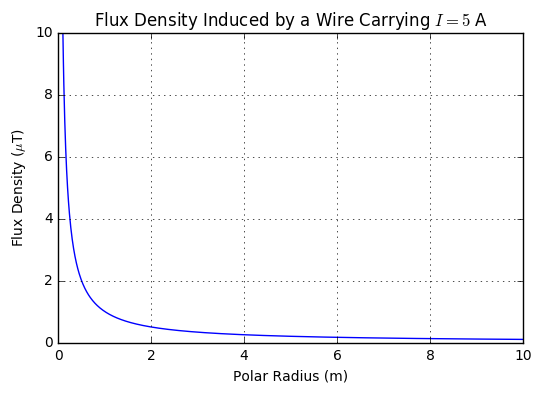

In [91]:
mu_0 = 4*pi*1e-7 # H/m
I_wire = 5 # current in A
r = arange(0.1,10+.01,.01)
B = mu_0*I_wire/(2*pi*r)
plot(r,B*1e6) # scale to micro T
xlabel(r'Polar Radius (m)')
ylabel(r'Flux Density ($\mu$T)')
title(r'Flux Density Induced by a Wire Carrying $I=5$ A')
grid();

# Problem 3: Ulaby 1.1
A 2 kHz sound wave traveling in the $x$ direction in air was observed to have a differential pressure $p(x,t) = 10$ N/m$^2$ at $x=0$ and $t=50\ \mu$s. If the reference phase of $p(x,t)$ is $36^\circ$, find the complete expression for $p(x,t)$. The velocity of sound in air is 330 m/s.

* From the given information we know that $T = 1/f = 1/2$ ms, $u_p = f\lambda = \lambda/T = 300$ m/s, and 
\begin{align}
    p(x=0,t=50\mu\text{s}) &= A\cos\left(\frac{2\pi \cdot 50\times 10^{-6}}{T} - \frac{2\pi \cdot 0}{\lambda} + 36^\circ\right) \\
    10 &= A\cos\left(2\pi 2\times 10^3 \cdot 50\times 10^{-6} + 36^\circ\right) \\
    10 &= A\cdot 0.3090\ \Rightarrow\ A = 10/0.3090 = 32.3625
\end{align}
* Also, $\lambda = 330/2000 = 0.1650$ m

* Other side calculations in the cells below:

In [92]:
# Check the cos value
print('%1.4f' % (cos(2*pi*2000*50e-6+36*pi/180),))

0.3090


In [93]:
# Form A
print('%2.4f' % (10/0.3090,))

32.3625


In [94]:
# Form lambda
print('%2.4f m' % (330/2000,))

0.1650 m


In [95]:
# Form 2/lambda
print('%2.4f m' % (2/(330/2000),))

12.1212 m


* Putting the pieces together we have
\begin{align}
    p(x,t) &= 32.3625\cos(2\pi(2000)t - 2\pi\, x/0.1650 + 36^\circ)\quad\text{N/m}^2 \\
    &= 32.3625\cos(2\pi(2000)t - 12.12\pi\, x + 36^\circ)\quad\text{N/m}^2 
\end{align}

# Problem 4: Ulaby 1.8
Two waves on a string are given by the following functions:
\begin{align}
    y_1(x,t) &= 4\cos(20t-30x)\quad\text{(cm)} \\
    y_2(x,t) &= -4\cos(20t+30x)\quad\text{(cm)} \\
\end{align}
where $x$ is in cm. The waves are said to interfere constructively when their superposition $|y_s| = |y_1 + y_2|$ is a maximum, and they interfere destructively when $|y_s|$ is a minumum.

## Part a
What are the directions of propagation of the waves $y_1(x,t)$ and $y_2(x,t)$?

* Inspecting the math model for the two waves, we see for the $y_1(x,t)$ a plus sign on the $t$ term and a minus sign on the $x$ term $\Rightarrow$ $+x$ propagation
* For the $y_2(x,t)$ a plus sign on the $t$ term and a plus sign on the $x$ term $\Rightarrow$ $-x$ propagation

## Part b
At $t = \pi/50$ s, at what location $x$ do the waves interfere constructively, and what is the corresponding value of $|y_s|$?

* The first step in the solution is to make a plot of $|y_s|$ so we can vizualize what is going on with the wave interaction
* In Chapter 2 this will be known as a *standing wave pattern*

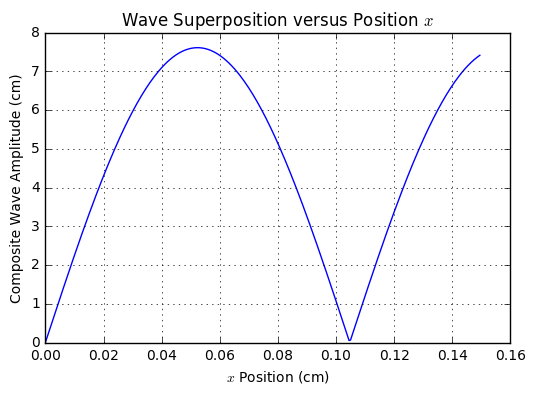

In [96]:
x = arange(0,0.15,.0005)
t = pi/50
y1 = 4*cos(20*t - 30*x)
y2 = -4*cos(20*t + 30*x)
ys = y1 + y2
plot(x,abs(ys))
xlabel(r'$x$ Position (cm)')
ylabel(r'Composite Wave Amplitude (cm)')
title(r'Wave Superposition versus Position $x$')
grid();

* Constructive interefernce occurs at multiple locations with respect to $x$
* The location of the first maximum can be obtained numerically using `find()`

In [97]:
ys_max = max(abs(ys))
xn_max = find(abs(ys) == ys_max)
print('x_max = %1.4f cm' % x[xn_max])

x_max = 0.0525 cm


* A precise mathematical solution can be found too by writing out $y_s(x,\pi/50)$ and applying a trig identity
\begin{align}
    y_s(x,\pi/50) &= 4\left[\cos(20(\pi/50) - 30x) - \cos(20(\pi/50)+30x)\right] \\
    &= 8\sin(2\pi/5)\cdot \sin(30x)
\end{align}
* The above is maximized in the magnitude sense when $\sin(30x) = 1$ or when $30x = n\cdot \pi/2$, where $n$ is an odd integer
* The smallest $x$ giving the maximum occurs when $30x = \pi/2$ or
\begin{align}
    x_{max} = \pi/60 = 0.0524\quad\text{(cm)}
\end{align}

In [98]:
# Check
print('pi/60 = %1.4f cm' % (pi/60,))

pi/60 = 0.0524 cm


## Part c
At $t = \pi/50$ s, at what location $x$ do the waves interfere destructively, and what is the corresponding value of $|y_s|$?

* This problem is very similar to (b) except now we search for the minimum
* Following the analysis, and consistent with the plot, we want to make $sin(30x) = 0$
* The first zero occurs when $x=0$, so
\begin{align}
    x_{min} = 0\quad\text{(cm)}
\end{align}

# Problem 5: Ulaby 1.11 (10pts Bonus)
The vertical displacement of a string is given by the harmonic function:
\begin{align}
    y(x,t) = 2\cos(16\pi\, t - 20\pi\, x)\quad\text{(m)}
\end{align}
where $x$ is the horizontal distance along the string in meters. Supose a time particle is attached to the string at $x=5$ cm. Obtain an expression for the vertical velocity of a partial as a function of time.

* The rate of change in vertical displacement refers to the derivative of the displacement with respect to time or velocity
* So we form $\partial y(x,t)/\partial t$ (partial is used to be clear that $x$ is not involved in the derivative)
\begin{align}
    y_v(x,t)& = \frac{\partial y(x,t)}{\partial t} = -2\cdot\sin(16\pi\, t - 20\pi\, x)\cdot 16\pi \\
    &= -32\pi \sin(16\pi\, t - 20\pi\, x)\quad\text{(m/s$^2$)}
\end{align}
* We can check this in Python by taking a numerical derivative for some value(s) of $x$ and then plotting
* The approach here is to write
\begin{align}
    y_v(x,t)& = \frac{\partial y(x,t)}{\partial t} \approx \frac{y(x,t+\Delta t)-y(x,t)}{(t+\Delta t) - t} = \frac{y(x,t+\Delta t)-y(x,t)}{\Delta t}\quad\text{(m/s$^2$)}
\end{align}
where $\Delta t$ is small (ideally approaches zero)
* The numpy function `diff(y)` forms the \textit{discrete difference}, i.e., $y[n+1] - y[n]$ for $0 \leq n < N-1$, where in Python an $N$-point array has indices running from 0 to $N-1$
* Since the difference can only be computed over $N-1$ point the array returned by `diff()` contains one less point, and when plotting you need to reduce the `t`-axis array by one point, i.e., `t[:-1]` means start at index zero and stop at one point from the end (in MATLAB you would use instead `end-1`)

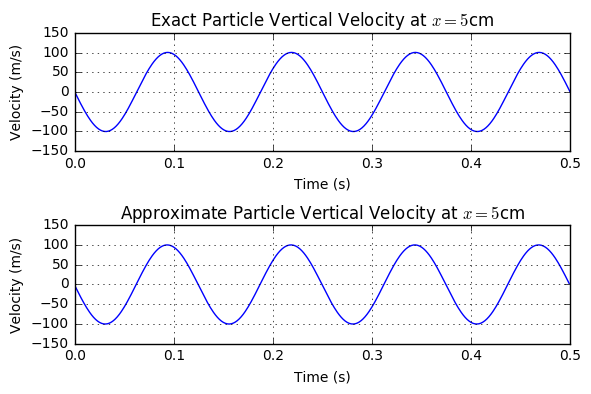

In [99]:
dt = 0.001
t = arange(0,.5+dt,dt)
x = 5
y = 2*cos(16*pi*t-20*pi*x)
y_v_thy = -32*pi*sin(16*pi*t-20*pi*x)
y_v_num = diff(y)/dt # approximate the derivative with a difference and normalize by dt
subplot(211)
plot(t,y_v_thy)
xlabel(r'Time (s)')
ylabel(r'Velocity (m/s)')
title(r'Exact Particle Vertical Velocity at $x = 5$cm')
grid();
subplot(212)
plot(t[:-1],y_v_num)
xlabel(r'Time (s)')
ylabel(r'Velocity (m/s)')
title(r'Approximate Particle Vertical Velocity at $x = 5$cm')
grid();
tight_layout()